# // DECISION TREE CLASSIFIER //

#Importing necessary libraries for data preprocessing

In [1]:
import pandas as pd #For reading the dataset and to perform framing functions if needed
import numpy as np  #linear algebra function
import matplotlib.pyplot as plt #for visualizing the data
import seaborn as sns #for data distribution

#Importing the dataset
I have used a simple 'weather status dataset' to perform a decision tree classifier

In [2]:
#---> Replace the path name for your path name
weather_data=pd.read_csv('C:/Users/ADMIN/Documents/Data science algorithms/weather_data.csv')

#Analysing and preprocessing the dataset

In [3]:
weather_data.head() #---> First 5 rows

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No


In [4]:
weather_data.shape

(14, 5)

In [5]:
weather_data.nunique()

Outlook        3
Temperature    3
Humidity       2
Wind           2
Play           2
dtype: int64

In [6]:
weather_data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

To perform the decision tree classifier, we need to encode strings into numerical values

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encode=LabelEncoder()
weather_data['Outlook_encode']=label_encode.fit_transform(weather_data['Outlook'])
weather_data['Temperature_encode']=label_encode.fit_transform(weather_data['Temperature'])
weather_data['Humidity_encode']=label_encode.fit_transform(weather_data['Humidity'])
weather_data['Wind_encode']=label_encode.fit_transform(weather_data['Wind'])

In [8]:
x=weather_data[['Outlook_encode','Temperature_encode','Humidity_encode','Wind_encode']]
x.head()

,Outlook_encode,Temperature_encode,Humidity_encode,Wind_encode
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0


In [9]:
y=weather_data.Play
y.head()

0     No
1     No
2    Yes
3    Yes
4     No
Name: Play, dtype: object

#Splitting the dataset into training and test dataset using scikit learn

In [10]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Training the model

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
tree=DecisionTreeClassifier(criterion='gini',splitter='best')
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
predict=tree.predict(x_train)
predict.flatten()

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes'], dtype=object)

In [15]:
from sklearn import metrics
report =metrics.classification_report(y_train,predict)
print(report)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         3
         Yes       1.00      1.00      1.00         8

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



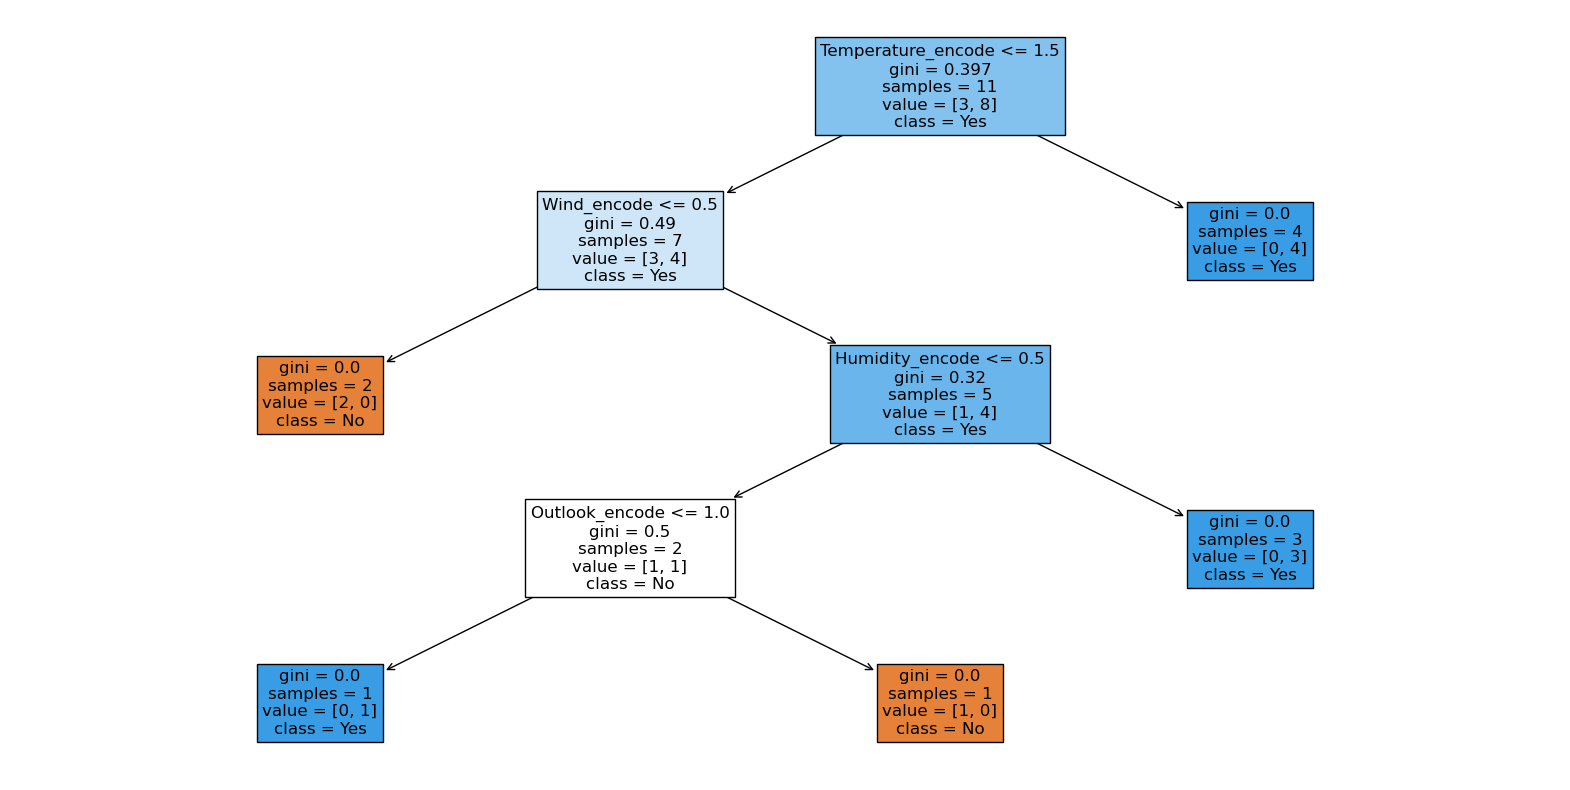

In [16]:
plt.figure(figsize=(20,10))
plot_tree(tree,feature_names=['Outlook_encode','Temperature_encode','Humidity_encode','Wind_encode'],class_names=['No','Yes'],filled=True,fontsize=12)
plt.show()

This classfier has produced a 100% accuracy for this data and the classification is done by "Gini"